In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
import warnings

warnings.filterwarnings('ignore')

In [26]:
import os
df = pd.read_csv('XSS_dataset.csv', encoding='utf-8-sig')
X = df['Sentence']
y = df['Label']

In [27]:
df.head(15)

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0
5,5,"<li id=""cite_note-118""><span class=""mw-cite-ba...",0
6,6,"<li><a href=""/wiki/Contextualism"" title=""Conte...",0
7,7,"<li id=""cite_note-Representing_causation-95""><...",0
8,8,"<tr><td class=""plainlist"" style=""padding:0 0....",0
9,9,\t </span>,0


In [28]:
print(df.shape)
df.isnull().sum()

(13686, 3)


Unnamed: 0    0
Sentence      0
Label         0
dtype: int64

In [29]:
#Removing Duplicate data
df.drop_duplicates(inplace=True)
#Dropping Coloums with missing values
print(df.dropna())

       Unnamed: 0                                           Sentence  Label
0               0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1               1               <tt onmouseover="alert(1)">test</tt>      1
2               2  \t </span> <span class="reference-text">Steeri...      0
3               3  \t </span> <span class="reference-text"><cite ...      0
4               4  \t </span>. <a href="/wiki/Digital_object_iden...      0
...           ...                                                ...    ...
13681       13681             <img onpointerenter=alert(1)>XSS</img>      1
13682       13682  <source onbeforepaste="alert(1)" contenteditab...      1
13683       13683  <div draggable="true" contenteditable>drag me<...      1
13684       13684  <li><cite id="CITEREFDomingos2015" class="cita...      0
13685       13685                                         \t </span>      0

[13686 rows x 3 columns]


In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

Unnamed: 0    0
Sentence      0
Label         0
dtype: int64

In [32]:
import nltk
# nltk.download()
# nltk.download('stopwords')

In [33]:
vectorizer = CountVectorizer(min_df = 1, max_df = 1, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

print(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Logistic Regression on test set : 0.9985390796201608
F1 Score of Logistic Regression on test set : 0.9986101459346769
sensitivity= 0.9979166666666667
specificity= 0.9992295839753467
Precision= 0.9993045897079277


In [38]:
import pickle
import os
fn= "LR.sav"
pickle.dump(lr_clf, open(fn, "wb"))

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(f"Accuracy of AadaBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of AadaBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of AadaBoost on test set : 0.9985390796201608
F1 Score of AadaBoost on test set : 0.9986101459346769
sensitivity= 0.9979166666666667
specificity= 0.9992295839753467
Precision= 0.9993045897079277


In [41]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Naive Bayes on test set : 0.8889700511322133
F1 Score of Naive Bayes on test set : 0.9044626021370208
sensitivity= 0.9993055555555556
specificity= 0.7665639445300462
Precision= 0.8260619977037887


In [42]:
fn= "GuaNB.sav"
pickle.dump(nb_clf, open(fn, "wb"))

In [43]:
import xgboost as xgb

In [44]:
XG_clf = xgb.XGBClassifier(n_estimators=100)
XG_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of XGBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of XGBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of XGBoost on test set : 0.8889700511322133
F1 Score of XGBoost on test set : 0.9044626021370208
sensitivity= 0.9993055555555556
specificity= 0.7665639445300462
Precision= 0.8260619977037887


In [45]:
fn= "xgb.sav"
pickle.dump(XG_clf, open(fn, "wb"))

In [46]:
import numpy as nm  
import matplotlib.pyplot as mtp

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DT_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Decision Tree on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Decision Tree on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Decision Tree on test set : 0.8889700511322133
F1 Score of Decision Tree on test set : 0.9044626021370208
sensitivity= 0.9993055555555556
specificity= 0.7665639445300462
Precision= 0.8260619977037887


In [49]:
import pickle
import os
fn= "decisionT.sav"
pickle.dump(DT_clf, open(fn, "wb"))
# pickle.dump(model, open(filename , "wb"))
# pickle.load(open("filename", "rb"))

### Building Ensemble Model


In [50]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('lr_clf', lr_clf), ('nb_clf', nb_clf), ('ada_clf', ada_clf), ('XG_clf', XG_clf), ('DT_clf', DT_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [51]:
model = ensemble.fit(X_train, y_train)

In [52]:
ensemble.score(X_test, y_test)

0.9989043097151206

In [53]:
fn = "ensemble.sav"
pickle.dump(model, open(fn, "wb"))

## Building CNN 

### Text to Number Function

In [2]:
df = pd.read_csv('../input/cross-site-scripting-xss-dataset-for-deep-learning/XSS_dataset.csv')
df = df[df['Label'].notna()] 
df = df[df['Sentence'].notna()] 
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [3]:
#Removing Duplicate data
df.drop_duplicates(inplace=True)
#Dropping Coloums with missing values
print(df.dropna())

       Unnamed: 0                                           Sentence  Label
0               0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1               1               <tt onmouseover="alert(1)">test</tt>      1
2               2  \t </span> <span class="reference-text">Steeri...      0
3               3  \t </span> <span class="reference-text"><cite ...      0
4               4  \t </span>. <a href="/wiki/Digital_object_iden...      0
...           ...                                                ...    ...
13681       13681             <img onpointerenter=alert(1)>XSS</img>      1
13682       13682  <source onbeforepaste="alert(1)" contenteditab...      1
13683       13683  <div draggable="true" contenteditable>drag me<...      1
13684       13684  <li><cite id="CITEREFDomingos2015" class="cita...      0
13685       13685                                         \t </span>      0

[13686 rows x 3 columns]


In [4]:
def data2char_index(X, max_len):
    alphabet = "abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
    result = [] 
    for data in X:
        mat = []
        for ch in data:
            ch = ch.lower()
            if ch not in alphabet:
                continue
            mat.append(alphabet.index(ch))
        result.append(mat)
    X_char = tf.keras.preprocessing.sequence.pad_sequences(np.array(result, dtype=object), padding='post',
                                                           truncating='post', maxlen=max_len)
    return X_char

### Data preprocessing

In [5]:
data = df['Sentence'].values
label = df['Label'].values

data = data2char_index(data, max_len=1000)

trainX, testX, y_train, y_test = train_test_split(data, label, test_size=0.1)
trainX, x_val, y_train, y_val = train_test_split(trainX, y_train, test_size=0.1)

print(trainX.shape)
print(y_train.shape)

(11085, 1000)
(11085,)



### CNN model 1
Convolution with three different kernel sizes, but not enough depth

In [6]:
def model_v1(max_len):
    main_input = tf.keras.layers.Input(shape=(max_len,))
    
    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=80, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    
    cnn1 = tf.keras.layers.Conv1D(32, 5, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=12)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(32, 10, padding='same', strides=1, activation='relu')(embed)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=11)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(32, 15, padding='same', strides=1, activation='relu')(embed)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=10)(cnn3)
    
    cnn = tf.keras.layers.concatenate([cnn1, cnn2, cnn3], axis=1)
    flat = tf.keras.layers.Flatten()(cnn)
    drop = tf.keras.layers.Dropout(0.2)(flat)
    dense1 = tf.keras.layers.Dense(1024, activation='relu')(drop)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model

### CNN model 2
Linear CNN, with deeper depth, can divide features into finer points

In [7]:
def model_v2(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=80, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    

    cnn1 = tf.keras.layers.Conv1D(32, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(64, 3, padding='same', strides=1, activation='relu')(cnn1)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(128, 3, padding='same', strides=1, activation='relu')(cnn2)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)
    
    concatenate = tf.keras.layers.concatenate([cnn3], axis=1)
    flat = tf.keras.layers.Flatten()(concatenate)
    drop = tf.keras.layers.Dropout(0.2)(flat)
    dense1 = tf.keras.layers.Dense(512, activation='relu')(drop)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model

### Hybrid Network Model 3 (CNN Hybrid GRU)

In [8]:
def model_v3(max_len):
    #輸入層
    main_input = tf.keras.layers.Input(shape=(max_len,))
    
    #嵌入層
    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=70, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)

    cnn1 = tf.keras.layers.Conv1D(32, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(64, 3, padding='same', strides=1, activation='relu')(cnn1)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(128, 3, padding='same', strides=1, activation='relu')(cnn2)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)
    flat1 = tf.keras.layers.Flatten()(cnn3)

    dense0 = tf.keras.layers.Dense(512, activation='relu')(embed)
    flat2 = tf.keras.layers.Flatten()(dense0)


    concatenate = tf.keras.layers.concatenate([flat1,flat2], axis=1)
    flat3 = tf.keras.layers.Flatten()(concatenate)
    drop = tf.keras.layers.Dropout(0.2)(flat3)
    dense1 = tf.keras.layers.Dense(512, activation='relu')(drop)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model


### Hybrid Network Model 4 (CNN Hybrid GRU)

In [9]:
def model_v4(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=80, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)

    cnn1 = tf.keras.layers.Conv1D(32, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(64, 3, padding='same', strides=1, activation='relu')(cnn1)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(128, 3, padding='same', strides=1, activation='relu')(cnn2)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)
    flat1 = tf.keras.layers.Flatten()(cnn3)

    GRU0 = tf.keras.layers.GRU(32, return_sequences=False, return_state=False)(embed)
    flat2 = tf.keras.layers.Flatten()(GRU0)


    concatenate = tf.keras.layers.concatenate([flat1,flat2], axis=1)
    dense1 = tf.keras.layers.Dense(512, activation='relu')(concatenate)
    drop = tf.keras.layers.Dropout(0.5)(dense1)
    dense2 = tf.keras.layers.Dense(64, activation='relu')(drop)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model


### Hybrid Network Model 5 (CNN Hybrid LSTM)

In [10]:
def model_v5(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))
    

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=70, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    

    cnn1 = tf.keras.layers.Conv1D(32, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(64, 3, padding='same', strides=1, activation='relu')(cnn1)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(128, 3, padding='same', strides=1, activation='relu')(cnn2)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)
    
    cnn4 = tf.keras.layers.Conv1D(256, 3, padding='same', strides=1, activation='relu')(cnn3)
    cnn4 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn4)
    

    flat1 = tf.keras.layers.Flatten()(cnn3)
    

    LSTM0 = tf.keras.layers.LSTM(64)(embed)

    concatenate = tf.keras.layers.concatenate([flat1,LSTM0], axis=1)
    dense1 = tf.keras.layers.Dense(512, activation='relu')(concatenate)
    drop = tf.keras.layers.Dropout(0.5)(dense1)
    dense2 = tf.keras.layers.Dense(64, activation='relu')(drop)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model

### More layers of CNN6
Overview
5-layer CNN + 2-layer fully connected

Fast speed, good effect

recommended epochs
3-4
record
Judgment result of empty sentence: 0.20587987

Select related sentence miss chance: 0.0 %

Obfuscated filling error rate: 0.0 %

Probability of mistakenly touching sentences related to single quotation marks: 0.0 %

In [11]:
def model_v6(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))
    

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=70, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    

    cnn1 = tf.keras.layers.Conv1D(32, 3, padding='same', strides=1, activation='relu')(embed)
    cnn1 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
    
    cnn2 = tf.keras.layers.Conv1D(64, 3, padding='same', strides=1, activation='relu')(cnn1)
    cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn2)
    
    cnn3 = tf.keras.layers.Conv1D(128, 3, padding='same', strides=1, activation='relu')(cnn2)
    cnn3 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)
    
    cnn4 = tf.keras.layers.Conv1D(512, 3, padding='same', strides=1, activation='relu')(cnn3)
    cnn4 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn4)
    
    cnn5 = tf.keras.layers.Conv1D(1024, 3, padding='same', strides=1, activation='relu')(cnn4)
    cnn5 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn5)
    
    concatenate = tf.keras.layers.concatenate([cnn5], axis=1)
    flat = tf.keras.layers.Flatten()(concatenate)
    drop = tf.keras.layers.Dropout(0.2)(flat)
    dense1 = tf.keras.layers.Dense(512, activation='relu')(drop)
    dense2 = tf.keras.layers.Dense(128, activation='relu')(dense1)
    main_output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)
    model = tf.keras.Model(inputs=main_input, outputs=main_output)
    return model

### Bidirectional LSTM7
Overview
* Slow and easily affected by malicious padding

64 LSTM units, stacked in 2 layers, made bidirectional
recommended epochs
1-2

In [12]:
def model_v7(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=70, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(embed)
    x = layers.Bidirectional(layers.LSTM(64))(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(main_input, outputs)
    model.summary()
    return model

### DNN fully connected layer model 8 (for baseline comparison)
Moderate accuracy and judgment

Recommended epochs: 3-4

In [13]:
def model_v8(max_len):

    main_input = tf.keras.layers.Input(shape=(max_len,))
    

    embedder = tf.keras.layers.Embedding(
        input_dim=70,  
        output_dim=70, 
        input_length=max_len,
        trainable=False
    )
    embed = embedder(main_input)
    

    flat = tf.keras.layers.Flatten()(embed)
    
    dnn = layers.Dense(512, activation="relu")(flat)
    dnn = layers.Dense(512, activation="relu")(dnn)
    dnn = layers.Dense(512, activation="relu")(dnn)
    dnn = layers.Dense(512, activation="relu")(dnn)
    dnn = layers.Dense(512, activation="relu")(dnn)
    dnn = layers.Dense(512, activation="relu")(dnn)
    dnn = layers.Dense(512, activation="relu")(dnn)
    
    outputs = layers.Dense(1, activation="sigmoid")(dnn)
    model = keras.Model(main_input, outputs)
    model.summary()
    return model

### Compile the model

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt

In [15]:
model = model_v6(max_len=1000)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

2022-09-17 12:11:50.383065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 70)          4900      
_________________________________________________________________
conv1d (Conv1D)              (None, 1000, 32)          6752      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 500, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 250, 128)          24704 

2022-09-17 12:11:50.480014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 12:11:50.480838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 12:11:50.482435: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-17 12:11:50.482738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

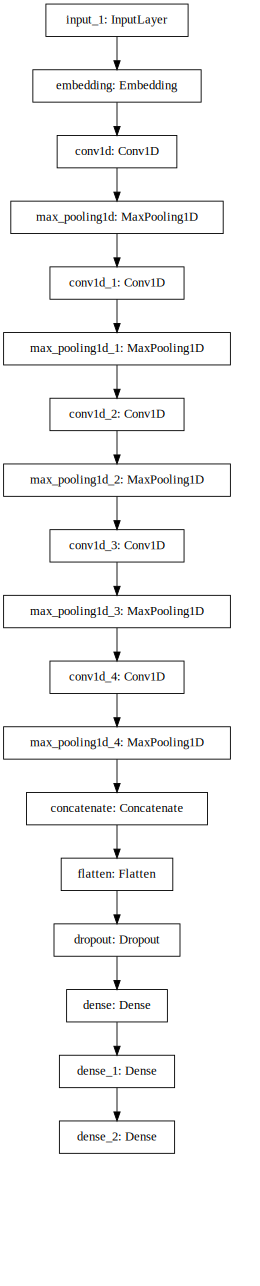

In [16]:
SVG(model_to_dot(model,dpi=65).create(prog='dot', format='svg'))

In [17]:
history_log= model.fit(trainX, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

2022-09-17 12:11:54.451408: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-17 12:11:56.385111: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


347/347 [==============================] - 13s 14ms/step - loss: 0.1023 - accuracy: 0.9539 - val_loss: 0.0199 - val_accuracy: 0.9951
Epoch 2/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0179 - accuracy: 0.9953 - val_loss: 0.0274 - val_accuracy: 0.9968
Epoch 3/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0128 - val_accuracy: 0.9959
Epoch 4/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0079 - val_accuracy: 0.9976
Epoch 5/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0195 - val_accuracy: 0.9951
Epoch 6/10
347/347 [==============================] - 5s 14ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0114 - val_accuracy: 0.9984
Epoch 7/10
347/347 [==============================] - 5s 13ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0128 - val_accuracy: 0.9976
Epoch 8/1

In [18]:
pred = model.predict(testX)
y_pred = np.int64(pred>0.5)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Accuracy : 0.997808619430241 
 Precision : 0.9974457215836526 
 Recall : 0.9987212276214834


In [27]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 



Saved model to disk


In [28]:
 
# # load json and create model
# json_file = open('./model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("./model.json")
# print("Loaded model from disk")

In [29]:
# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

### training Results

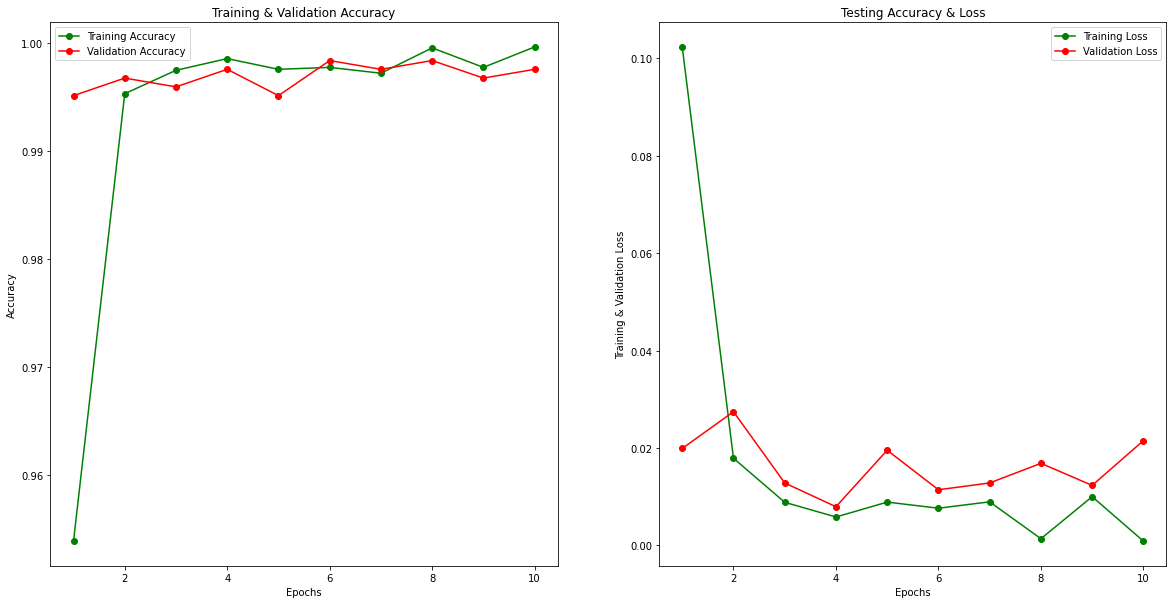

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
history_dict = history_log.history
cc = history_dict['accuracy']
loss = history_dict['loss']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
epochs = range(1,len(cc)+1)

ax[0].plot(epochs , cc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_accuracy , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()
fig.savefig('foo11.pdf')

In [33]:
# from sklearn.ensemble import VotingClassifier
# #create a dictionary of our models
# estimators=[('lr_clf', lr_clf), ('nb_clf', nb_clf), ('ada_clf', ada_clf), ('XG_clf', XG_clf), ('DT_clf', DT_clf), ('model',model )]
# #create our voting classifier, inputting our models
# ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
final_ensemble = ensemble.fit(trainX, y_train)
final_ensemble.scrore(textX, y_test)

In [ ]:
# Saving Model
fn = "Final_ensemble.sav"
pickle.dump(final_ensemble, open(fn, "wb"))